# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('/Users/puru/Desktop/Google Trends Data Viz (start)/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/Users/puru/Desktop/Google Trends Data Viz (start)/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/Users/puru/Desktop/Google Trends Data Viz (start)/Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('/Users/puru/Desktop/Google Trends Data Viz (start)/UE Benefits Search vs UE Rate 2004-20.csv')



# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
print(df_tesla.shape)
df_tesla.head()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [4]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')


Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [5]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [6]:
print(df_unemployment.shape)
df_unemployment.head()


(200, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [7]:
print(f'Largest value for "Unemployment Benefits" in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')


Largest value for "Unemployment Benefits" in Web Search: 100


### Bitcoin

In [8]:
# View shape and head of df_btc_price
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [9]:
# View shape and head of df_btc_search
print(df_btc_search.shape)
df_btc_search.head()


(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [10]:
print(f'largest BTC News Search {df_btc_search.BTC_NEWS_SEARCH.max()}')


largest BTC News Search 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [11]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')



Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 
Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [12]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')



Missing values for BTC price?: True


In [13]:
print(f'Number of missing values: {df_btc_price.isna().sum().sum()}')


Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [14]:
print(f"Any missing values left? {df_btc_price.isna().values.any()}")
print(f"Total missing values: {df_btc_price.isna().sum().sum()}")


Any missing values left? True
Total missing values: 2


In [15]:
df_btc_price.dropna(inplace=True)

In [16]:
print(f"Any missing values left? {df_btc_price.isna().values.any()}")

Any missing values left? False


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [17]:
# 1. Convert Tesla 'MONTH' column
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])



In [18]:
# 2. Convert Unemployment 'MONTH' column
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [19]:
# 3. Convert BTC Search 'MONTH' column
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])


In [20]:
# 4. Convert BTC Price 'DATE' column
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])


In [23]:
print(df_tesla.dtypes)
print(df_unemployment.dtypes)
print(df_btc_search.dtypes)
print(df_btc_price.dtypes)


MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object
MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object
MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object
DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [24]:
df_btc_price.set_index('DATE', inplace=True)


In [27]:
df_btc_monthly = df_btc_price.resample('ME').mean()


In [26]:
print(df_btc_monthly.head())


                 CLOSE        VOLUME
DATE                                
2014-09-30  407.182428  2.934864e+07
2014-10-31  364.148873  2.912885e+07
2014-11-30  366.099799  2.199111e+07
2014-12-31  341.267871  1.784201e+07
2015-01-31  248.782547  3.544555e+07


# Data Visualisation

### Notebook Formatting & Style Helpers

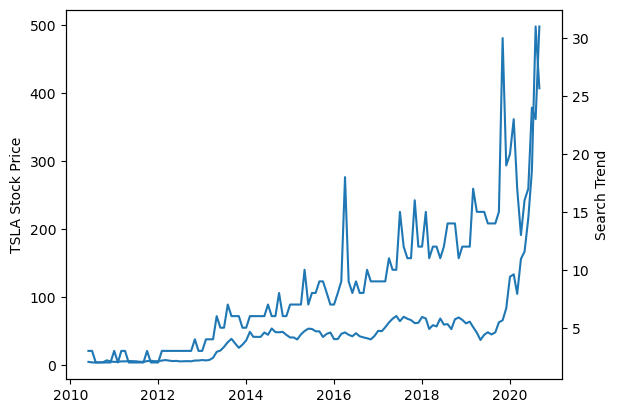

In [28]:
# Create locators for ticks on the time axis
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

In [29]:
# Register date converters to avoid warning messages
import pandas.plotting as pd_plotting

pd_plotting.register_matplotlib_converters()


### Adding Colors

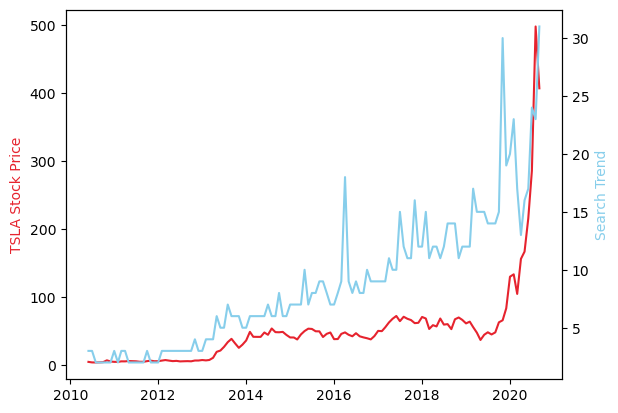

In [30]:
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')

### Additional styling, increasing size & resolution

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

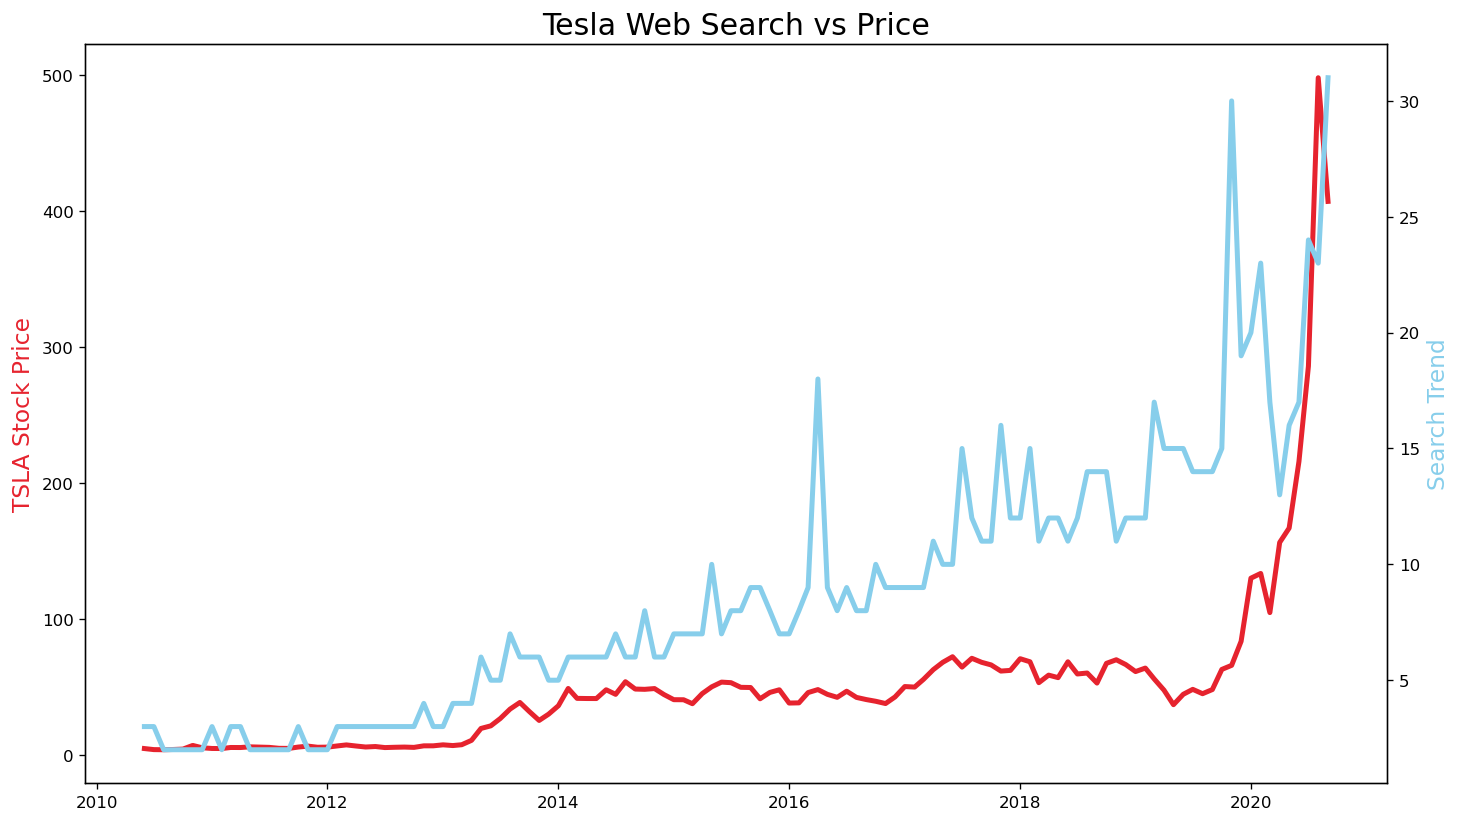

In [33]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
 
# Displays chart explicitly
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

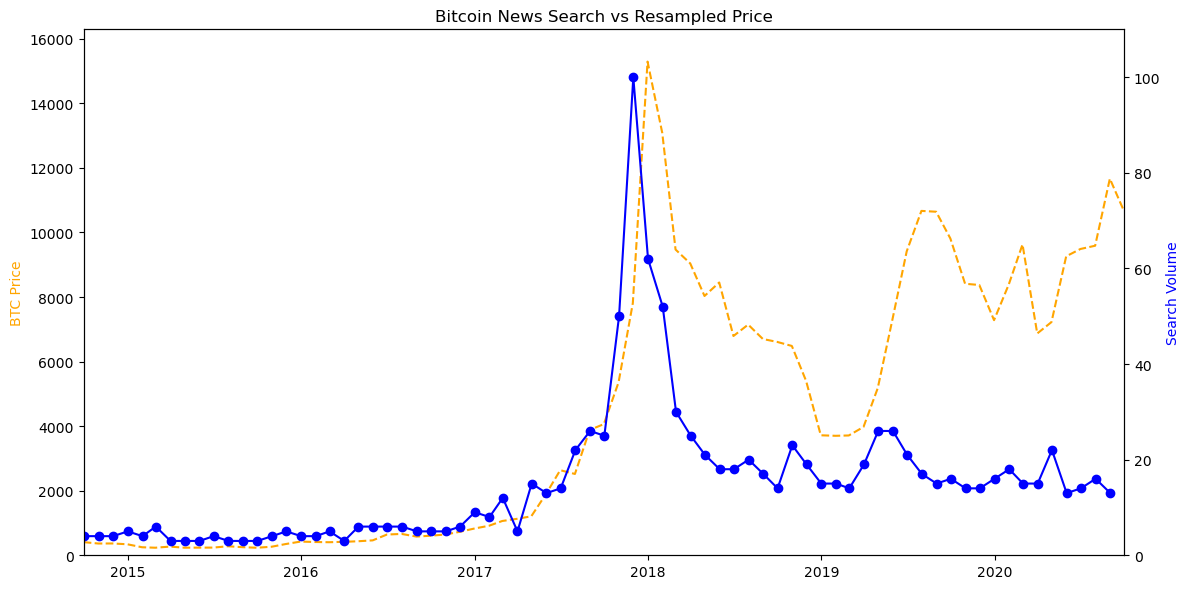

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure DATE is index in df_btc_price and MONTH is datetime in df_btc_search
# Already done earlier:
# df_btc_price.set_index('DATE', inplace=True)
# df_btc_monthly = df_btc_price.resample('ME').mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create second y-axis
ax2 = ax1.twinx()

# Plot BTC Resampled Price with dashed line
ax1.plot(df_btc_monthly.index, df_btc_monthly['CLOSE'], color='orange', linestyle='--', label='BTC Price')

# Plot BTC News Search with circle markers
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='blue', marker='o', label='BTC Search Volume')

# Set axis labels
ax1.set_ylabel('BTC Price', color='orange')
ax2.set_ylabel('Search Volume', color='blue')

# Set title
plt.title('Bitcoin News Search vs Resampled Price')

# Set x-axis ticks
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve appearance with grid and limits
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
ax1.set_ylim([0, df_btc_monthly['CLOSE'].max() + 1000])
ax2.set_ylim([0, df_btc_search.BTC_NEWS_SEARCH.max() + 10])

# Show the plot
plt.tight_layout()
plt.show()


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

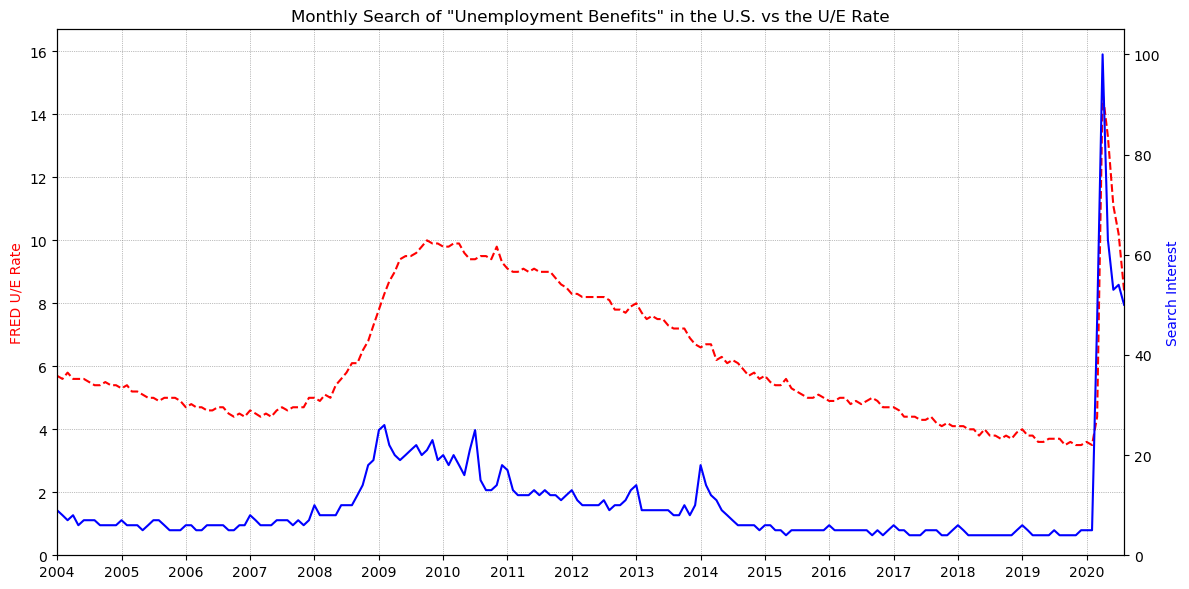

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a twin axis for the web search data
ax2 = ax1.twinx()

# Plot unemployment rate on ax1 with dashed line
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='red', linestyle='--', label='U/E Rate')

# Plot search interest on ax2 with default solid line
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='blue', label='Search Interest')

# Set axis labels
ax1.set_ylabel('FRED U/E Rate', color='red')
ax2.set_ylabel('Search Interest', color='blue')

# Set chart title
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

# Add grey grid to main axis
ax1.grid(True, color='grey', linestyle=':', linewidth=0.5)

# Format the x-axis for year-based ticks
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set axis limits (adjust based on your data range)
ax1.set_ylim([0, df_unemployment.UNRATE.max() + 2])
ax2.set_ylim([0, df_unemployment.UE_BENEFITS_WEB_SEARCH.max() + 5])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the plot
plt.tight_layout()
plt.show()


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


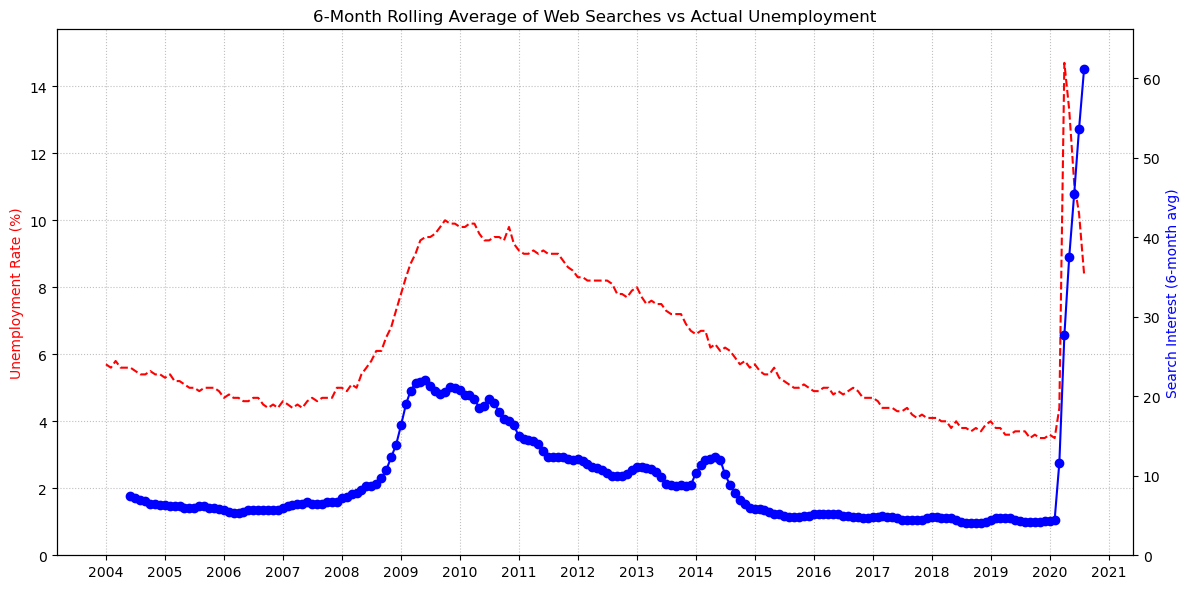

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Calculate 6-month rolling average
df_unemployment['6MO_ROLLING_AVG_SEARCH'] = df_unemployment['UE_BENEFITS_WEB_SEARCH'].rolling(window=6).mean()

# Step 2: Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot actual unemployment rate
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='red', label='Unemployment Rate', linestyle='--')

# Plot 6-month rolling avg of web search
ax2.plot(df_unemployment.MONTH, df_unemployment['6MO_ROLLING_AVG_SEARCH'], color='blue', label='6-Mo Rolling Search Avg', marker='o')

# Labels
ax1.set_ylabel('Unemployment Rate (%)', color='red')
ax2.set_ylabel('Search Interest (6-month avg)', color='blue')
plt.title('6-Month Rolling Average of Web Searches vs Actual Unemployment')

# Grid and time formatting
ax1.grid(True, linestyle=':', color='gray', alpha=0.5)
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Optional limits
ax1.set_ylim([0, df_unemployment.UNRATE.max() + 1])
ax2.set_ylim([0, df_unemployment['6MO_ROLLING_AVG_SEARCH'].max() + 5])

plt.tight_layout()
plt.show()


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [37]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])


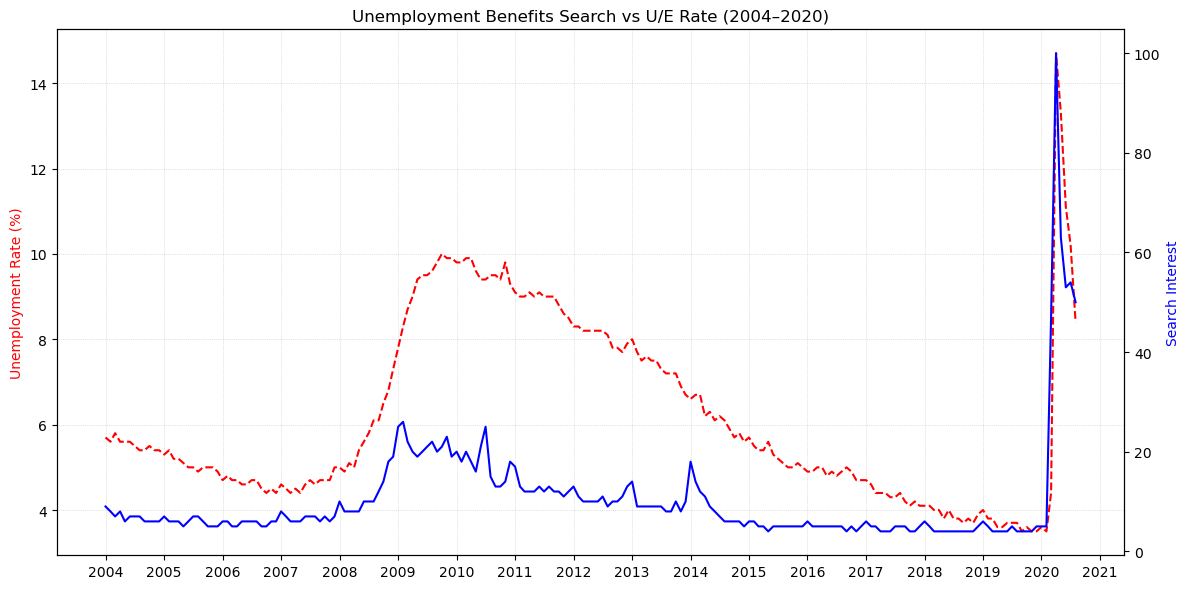

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot U/E Rate with dashed red line
ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='red', linestyle='--', label='U/E Rate')

# Plot search interest in blue
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='blue', label='Search Interest')

# Set labels and title
ax1.set_ylabel('Unemployment Rate (%)', color='red')
ax2.set_ylabel('Search Interest', color='blue')
plt.title('Unemployment Benefits Search vs U/E Rate (2004–2020)')

# Format time ticks
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add grid
ax1.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

# Tight layout
plt.tight_layout()
plt.show()


# 📘 Learning Summary: Google Trends Data Visualization Project

## 🔍 Project Overview
This project focused on visualizing the relationship between Google search trends and real-world metrics such as:
- Tesla stock price
- Bitcoin price
- U.S. unemployment rate

The goal was to **draw insights** by comparing **search interest** with **actual outcomes**, using data from multiple sources and improving data storytelling with Matplotlib visualizations.

---

## 🧠 Key Skills & Concepts Learned

### ✅ 1. Data Import & Cleaning
- Loaded multiple `.csv` files using `pandas.read_csv()`
- Converted `MONTH` columns to `datetime` objects using `pd.to_datetime()`
- Checked for missing values and cleaned the data

### ✅ 2. Resampling & Aggregation
- Applied `.resample('M')` to convert daily data into monthly summaries
- Used `.mean()` for resampling to align with monthly trends

### ✅ 3. Multi-Axis Plotting
- Used `plt.twinx()` to compare **two metrics with different scales** on one plot  
  _Example: BTC Price vs BTC Search Volume, Tesla Stock vs Web Search Trend_

### ✅ 4. Plot Formatting Techniques
- Customized charts with:
  - `linestyle` (e.g., dashed lines for U/E Rate)
  - `marker` styles (e.g., dots for search interest)
  - `ax.set_ylabel()` for dual-axis labeling
  - Date formatting with `matplotlib.dates.YearLocator()` and `DateFormatter('%Y')`

### ✅ 5. Smoothing with Rolling Averages
- Used `.rolling(window=6).mean()` to calculate 6-month rolling averages
- Helped reveal **lagging indicators** or **leading search trends**

### ✅ 6. Insight Extraction
- Observed:
  - **Spikes in search interest** often precede **price or rate changes**
  - Strong visual correlation between **search data** and **real-world behavior**
  - Sharp unemployment spikes in **2020**, preceded by search interest surge

---

## 📊 Tools & Libraries Used
- `pandas` for data wrangling  
- `matplotlib.pyplot` for plotting  
- `matplotlib.dates` for date tick formatting

---

## 🤔 Reflections
- Google Trends can act as a **leading indicator** for major real-world events.
- Data visualization enhances our ability to uncover **hidden relationships** in data.
- Carefully formatting and dual-axis plotting adds clarity to **comparative analysis**.
